# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

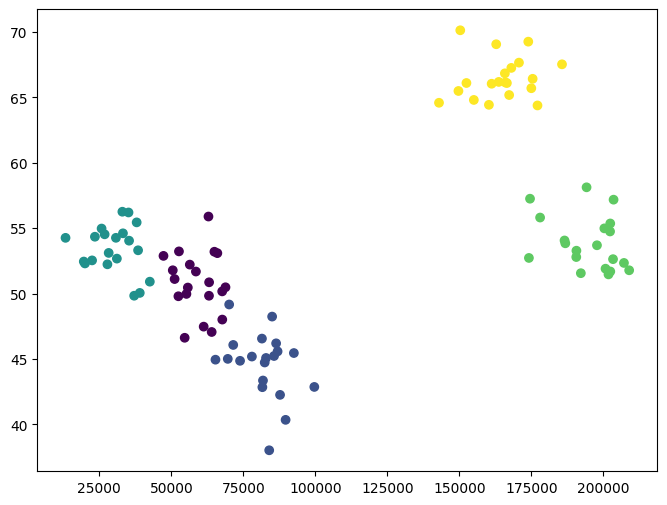

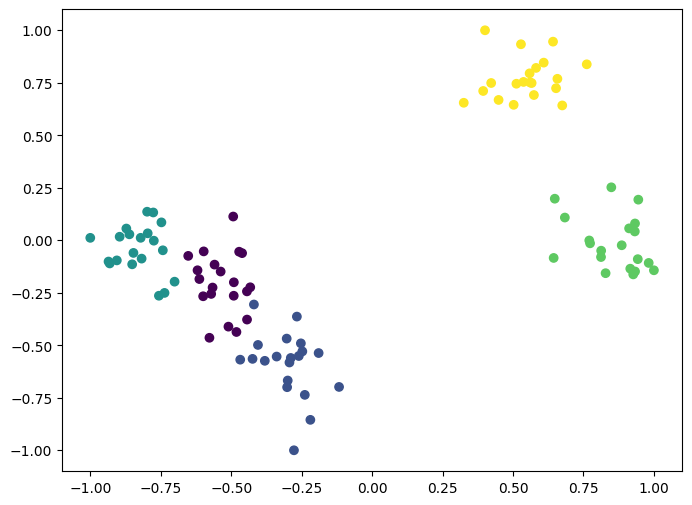

In [2]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [3]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

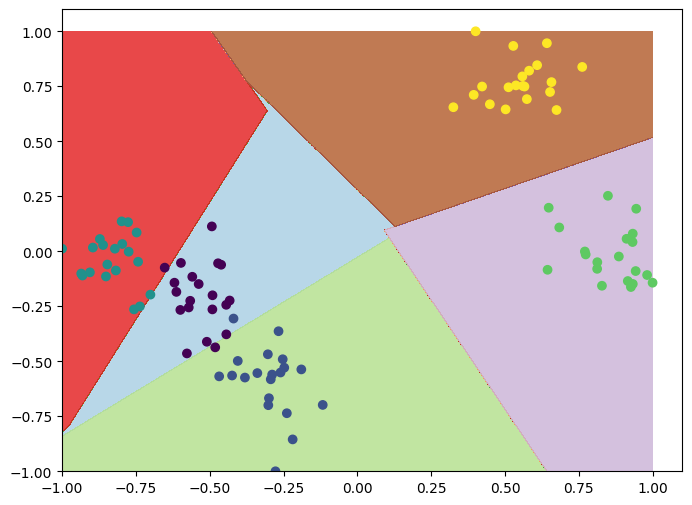

In [4]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

In [5]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [6]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?

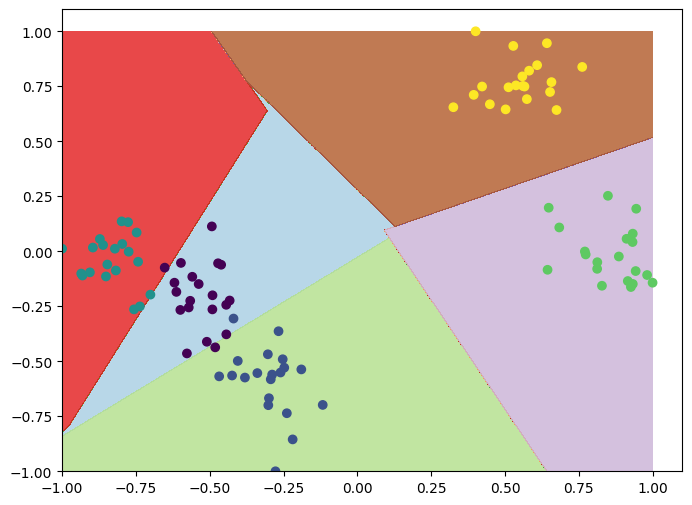

Prediction for point [200000, 40] with linear kernel: [3]
Prediction for point [50000, 65] with linear kernel: [2]


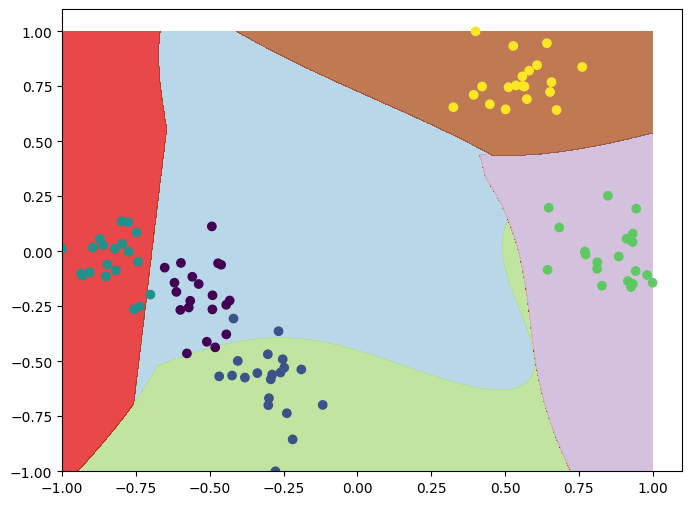

Prediction for point [200000, 40] with poly kernel: [3]
Prediction for point [50000, 65] with poly kernel: [0]


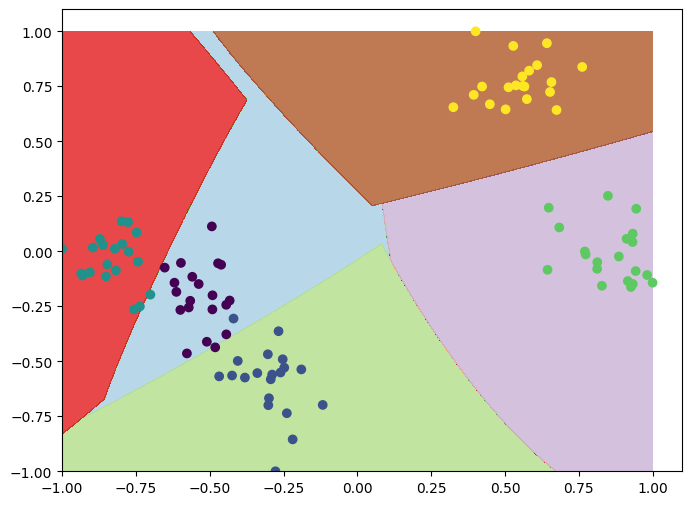

Prediction for point [200000, 40] with rbf kernel: [3]
Prediction for point [50000, 65] with rbf kernel: [2]


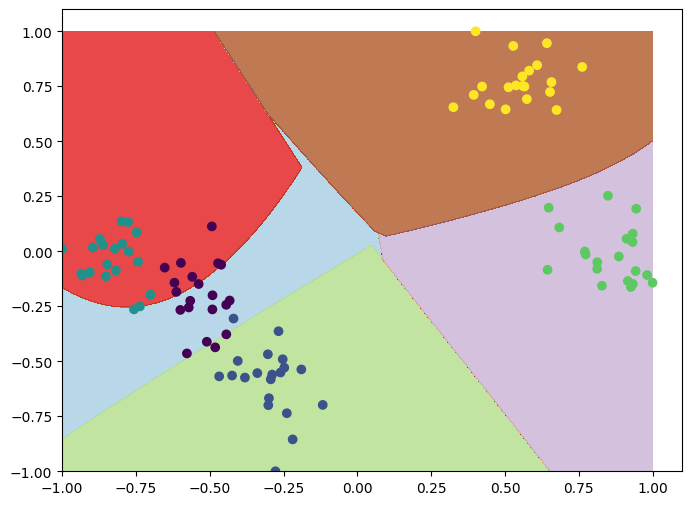

Prediction for point [200000, 40] with sigmoid kernel: [3]
Prediction for point [50000, 65] with sigmoid kernel: [2]


In [7]:
# Testing different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Train SVC with current kernel
    svc = svm.SVC(kernel=kernel, C=C).fit(X, y)
    
    # Plot predictions
    plotPredictions(svc)
    
    # Print predictions for sample points
    point1 = [[200000, 40]]  # high income, mid-age
    point2 = [[50000, 65]]    # lower income, older age
    
    print(f"Prediction for point [200000, 40] with {kernel} kernel:", svc.predict(scaling.transform(point1)))
    print(f"Prediction for point [50000, 65] with {kernel} kernel:", svc.predict(scaling.transform(point2)))


- The linear kernel predicted the point [200000, 40] to belong to cluster [3] and the point [50000, 65] to belong to cluster [2].
- Similarly, the radial basis function (RBF) kernel and sigmoid kernel produced the same predictions for these points, assigning [3] to [200000, 40] and [2] to [50000, 65].
Overall, regardless of the kernel used (linear, RBF, or sigmoid), the predictions for the given points [200000, 40] and [50000, 65] remain consistent with cluster [3] and [2] respectively. This suggests that the data points are robustly clustered and separable using these different kernel functions.

## Iris Dataset

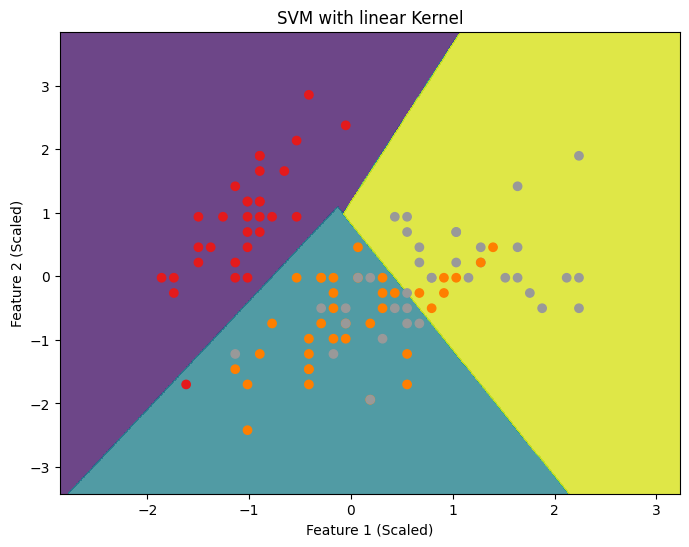

Accuracy on test set with linear kernel: 0.73


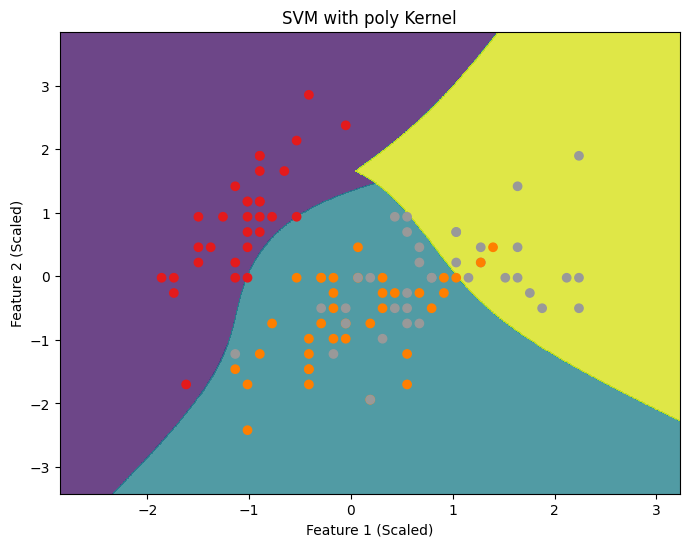

Accuracy on test set with poly kernel: 0.76


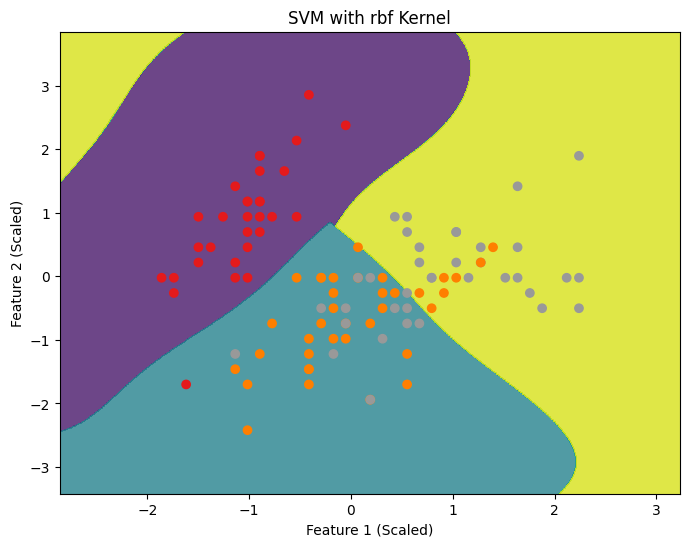

Accuracy on test set with rbf kernel: 0.73


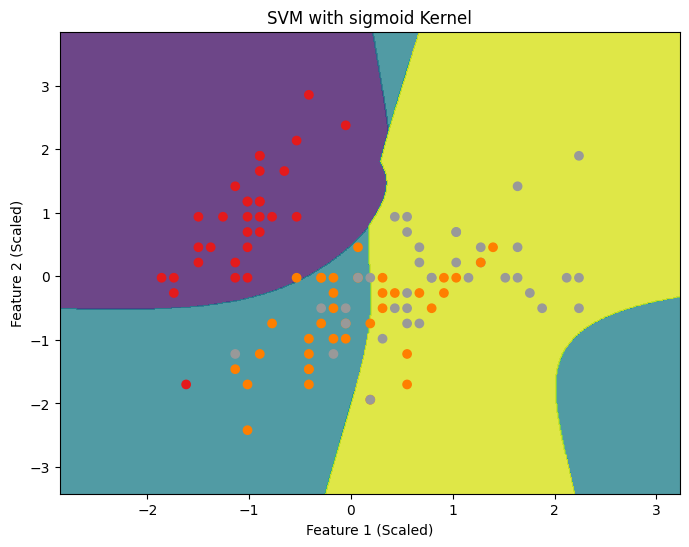

Accuracy on test set with sigmoid kernel: 0.78


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train SVC with specified kernel and plot decision boundaries
def train_and_plot(kernel):
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train_scaled, y_train)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.title(f"SVM with {kernel} Kernel")
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Set1)
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.show()
    
    # Evaluate accuracy on test set
    y_pred = svc.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set with {kernel} kernel: {accuracy:.2f}")

# Test different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    train_and_plot(kernel)



The SVM classifier with the sigmoid kernel achieved the highest accuracy on the test set among the tested kernels, with an accuracy of 0.78.

### I love fun 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all features
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM classifier with sigmoid kernel
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)
svc_sigmoid.fit(X_scaled, y)

# Make predictions on new data points
new_data_points = np.array([[5.1, 3.5, 1.4, 0.2],  # Example data point for Iris setosa
                             [6.2, 2.9, 4.3, 1.3],  # Example data point for Iris versicolor
                             [7.3, 3.3, 6.3, 2.5]]) # Example data point for Iris virginica

# Standardize the new data points using the same scaler
new_data_points_scaled = scaler.transform(new_data_points)

# Predict classes for new data points
predictions = svc_sigmoid.predict(new_data_points_scaled)

# Map predicted class indices to actual class labels
predicted_species = [iris.target_names[prediction] for prediction in predictions]

# Print the predicted species for each data point
for i, data_point in enumerate(new_data_points):
    print(f"Data Point {i+1}: {data_point} -> Predicted Species: {predicted_species[i]}")


Data Point 1: [5.1 3.5 1.4 0.2] -> Predicted Species: setosa
Data Point 2: [6.2 2.9 4.3 1.3] -> Predicted Species: versicolor
Data Point 3: [7.3 3.3 6.3 2.5] -> Predicted Species: virginica


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM classifier with sigmoid kernel
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)
svc_sigmoid.fit(X_scaled, y)

# Define new data points for prediction
new_data_points = np.array([[1.4, 0.2],     # Example data point for Iris setosa
                             [4.3, 1.3],     # Example data point for Iris versicolor
                             [6.3, 2.5],     # Example data point for Iris virginica
                             [8.0, 4.5]])    # for fun

# Standardize the new data points using the same scaler
new_data_points_scaled = scaler.transform(new_data_points)

# Predict classes for new data points
predictions = svc_sigmoid.predict(new_data_points_scaled)

# Map predicted class indices to actual class labels
predicted_species = [iris.target_names[prediction] for prediction in predictions]

# Print the predicted species for each data point
for i, data_point in enumerate(new_data_points):
    print(f"Data Point {i+1}: Petal Length = {data_point[0]}, Petal Width = {data_point[1]} -> Predicted Species: {predicted_species[i]}")


Data Point 1: Petal Length = 1.4, Petal Width = 0.2 -> Predicted Species: setosa
Data Point 2: Petal Length = 4.3, Petal Width = 1.3 -> Predicted Species: versicolor
Data Point 3: Petal Length = 6.3, Petal Width = 2.5 -> Predicted Species: virginica
Data Point 4: Petal Length = 8.0, Petal Width = 4.5 -> Predicted Species: versicolor


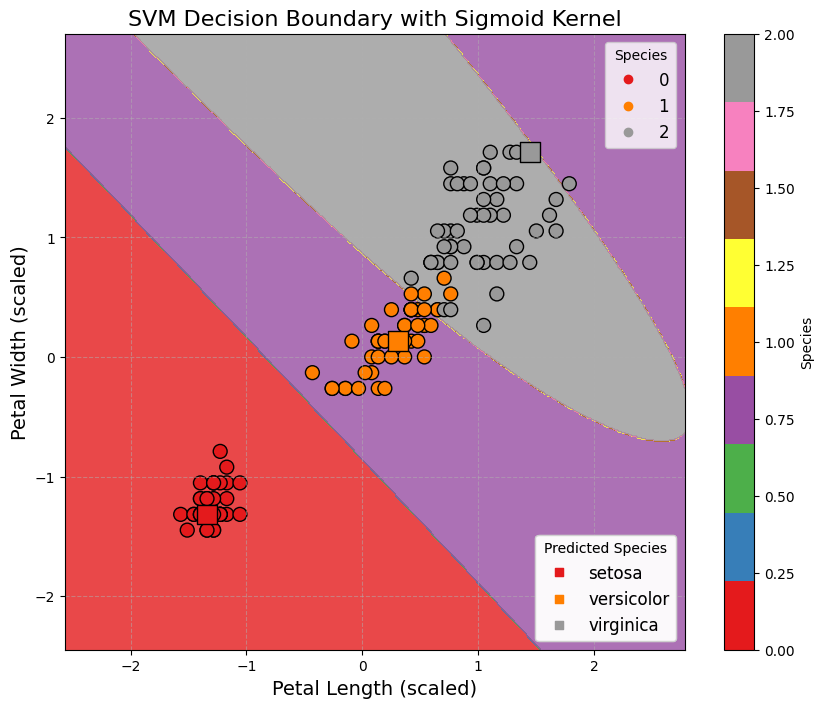

Data Point 1: Petal Length = 1.4, Petal Width = 0.2 -> Predicted Species: setosa
Data Point 2: Petal Length = 4.3, Petal Width = 1.3 -> Predicted Species: versicolor
Data Point 3: Petal Length = 6.3, Petal Width = 2.5 -> Predicted Species: virginica
Data Point 4: Petal Length = 8.0, Petal Width = 4.5 -> Predicted Species: versicolor


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM classifier with sigmoid kernel
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)
svc_sigmoid.fit(X_scaled, y)

# Define new data points for prediction
new_data_points = np.array([[1.4, 0.2],     # Example data point for Iris setosa
                             [4.3, 1.3],     # Example data point for Iris versicolor
                             [6.3, 2.5],     # Example data point for Iris virginica
                             [8.0, 4.5]])    # Additional new data point

# Standardize the new data points using the same scaler
new_data_points_scaled = scaler.transform(new_data_points)

# Predict classes for new data points
predictions = svc_sigmoid.predict(new_data_points_scaled)

# Map predicted class indices to actual class labels
predicted_species = [iris.target_names[prediction] for prediction in predictions]

# Plotting the decision boundary and new data points
plt.figure(figsize=(10, 8))

# Plot decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svc_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)

# Plot existing Iris dataset with legend for species
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=100, label='Iris Data')
legend1 = plt.legend(*scatter.legend_elements(), title="Species", fontsize=12)
plt.gca().add_artist(legend1)  # Add legend back to the plot

# Plot new data points with predicted labels
scatter_new = plt.scatter(new_data_points_scaled[:, 0], new_data_points_scaled[:, 1], c=predictions, cmap=plt.cm.Set1, marker='s', s=200, edgecolor='k', label='New Data Points')

# Create custom legend for new data points
handles, labels = scatter_new.legend_elements()
legend2 = plt.legend(handles, predicted_species, title="Predicted Species", fontsize=12, loc='lower right')
plt.gca().add_artist(legend2)  # Add legend back to the plot

# Add labels, title, and colorbar
plt.xlabel('Petal Length (scaled)', fontsize=14)
plt.ylabel('Petal Width (scaled)', fontsize=14)
plt.title('SVM Decision Boundary with Sigmoid Kernel', fontsize=16)
plt.colorbar(label='Species')

# Set plot limits
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Print the predicted species for each new data point
for i, data_point in enumerate(new_data_points):
    print(f"Data Point {i+1}: Petal Length = {data_point[0]}, Petal Width = {data_point[1]} -> Predicted Species: {predicted_species[i]}")
